# **SARIMAX Model Building**


## SARIMAX Model
* The SARIMAX model parameters were inferred from ACF/PACF plots of differenced SG GDP in Data Exploration phase
* Tested with split ratio of 0.65, 0.7, and 0.75.
* Split ratio of 65:35 showed the best performance.
* RSI feature dropped due to low correlation and causality.


     EVALUATION     
RMSE: 3326.767 | MAE: 2093.013 | MAPE: 1.72% | R²: 0.901 | Adj. R²: 0.878 | Theil's U: 0.997



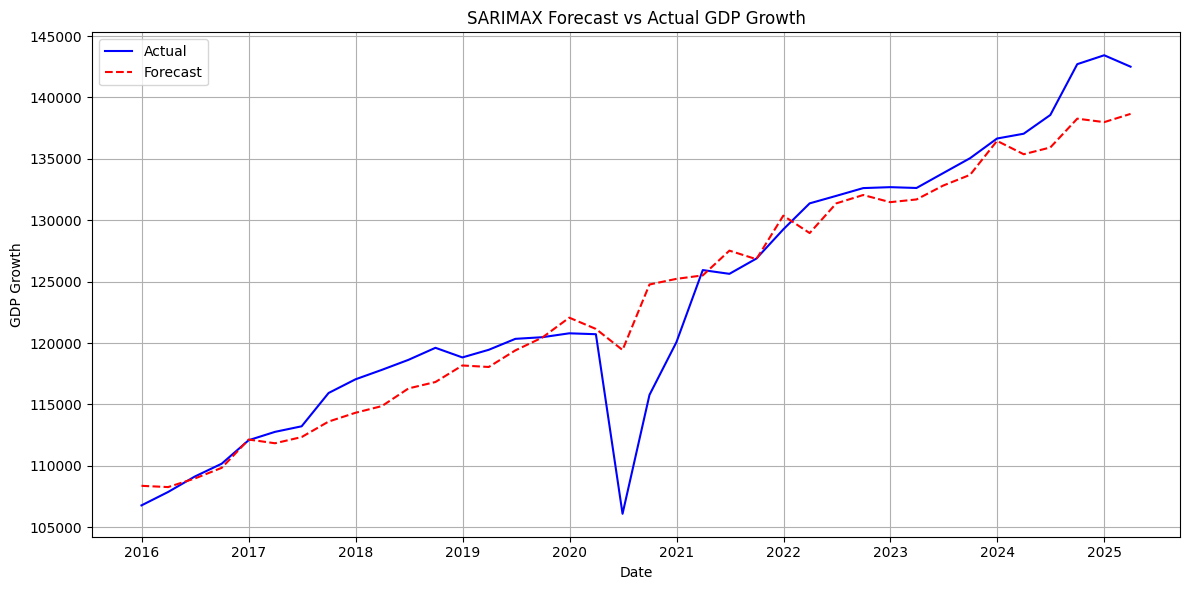

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load & preprocess
df = pd.read_csv('ModellingData.csv', index_col=0)
df.index = pd.to_datetime(df.index)

# Define target and features
y = df['sg_gdp']
X = df.drop(columns=['sg_gdp', 'rsi'])

# Train-test split (temporal)
split_point = int(len(df) * 0.65)
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]

# Define SARIMAX configuration
order = (1, 1, 0)
seasonal_order = (3, 1, 1, 4)

# Fit SARIMAX model
sarimax_model = sm.tsa.SARIMAX(
    y_train,
    exog=X_train,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity= True,
    enforce_invertibility= True
)

sarimax_results = sarimax_model.fit(disp=True)

# Forecast
y_pred = sarimax_results.forecast(steps=len(y_test), exog=X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# Adjusted R-squared
n = len(y_test)  # Number of observations in test set
k = X_test.shape[1] if X_test is not None else 0  # Number of exogenous features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Theil's U
def theils_u(actual, forecast):
    # Naive forecast (previous period's actual value)
    naive_forecast = actual.shift(1).dropna()
    
    # Align forecasts with naive forecast
    actual = actual.iloc[1:]
    forecast = forecast.iloc[1:]
    
    # Calculate RMSEs
    rmse_model = np.sqrt(mean_squared_error(actual, forecast))
    rmse_naive = np.sqrt(mean_squared_error(actual, naive_forecast))
    
    return rmse_model / rmse_naive

u_stat = theils_u(y_test, y_pred)

print("\n====================")
print("     EVALUATION     ")
print("====================")
print(f"RMSE: {rmse:.3f} | MAE: {mae:.3f} | MAPE: {mape:.2f}% | R²: {r2:.3f} | Adj. R²: {adjusted_r2:.3f} | Theil's U: {u_stat:.3f}\n")

# Plot forecast vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Forecast', color='red', linestyle='--')
plt.title('SARIMAX Forecast vs Actual GDP Growth')
plt.xlabel('Date')
plt.ylabel('GDP Growth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Searching Optimal SARIMAX Parameters through Manual Grid Search
* Uses Akaike Information Criterion (AIC) score to inform best SARIMAX model selection 
* AIC Formula: -2 ln (L) + 2k, where L = Likelihood / k = No. of Parameters 
* Score used to measure and compare quality of statistical models on same dataset.
* Can be used to compare different AR/MA components, but DO NOT use for comparing differencing (D,d)

In [42]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 625.1/625.1 kB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ----------------------------------- ---- 2.4/2.7 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 12.0 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ------------------------------------


=== Testing 256 parameter combinations ===

TRY 1/256: Order=(0, 1, 0), Seasonal=(0, 1, 0, 4)
AIC: 1348.54 | Converged: False
NEW BEST! AIC: 1348.54

TRY 2/256: Order=(0, 1, 0), Seasonal=(0, 1, 1, 4)
AIC: 1193.48 | Converged: False
NEW BEST! AIC: 1193.48

TRY 3/256: Order=(0, 1, 0), Seasonal=(0, 1, 2, 4)
AIC: 1145.84 | Converged: True
NEW BEST! AIC: 1145.84

TRY 4/256: Order=(0, 1, 0), Seasonal=(0, 1, 3, 4)
AIC: 1183.72 | Converged: True

TRY 5/256: Order=(0, 1, 0), Seasonal=(1, 1, 0, 4)
AIC: 1174.86 | Converged: False

TRY 6/256: Order=(0, 1, 0), Seasonal=(1, 1, 1, 4)
AIC: 1192.15 | Converged: True

TRY 7/256: Order=(0, 1, 0), Seasonal=(1, 1, 2, 4)
AIC: 1144.79 | Converged: True
NEW BEST! AIC: 1144.79

TRY 8/256: Order=(0, 1, 0), Seasonal=(1, 1, 3, 4)
AIC: 1191.04 | Converged: True

TRY 9/256: Order=(0, 1, 0), Seasonal=(2, 1, 0, 4)
AIC: 1246.17 | Converged: True

TRY 10/256: Order=(0, 1, 0), Seasonal=(2, 1, 1, 4)
AIC: 1226.77 | Converged: True

TRY 11/256: Order=(0, 1, 0), Seasonal=(

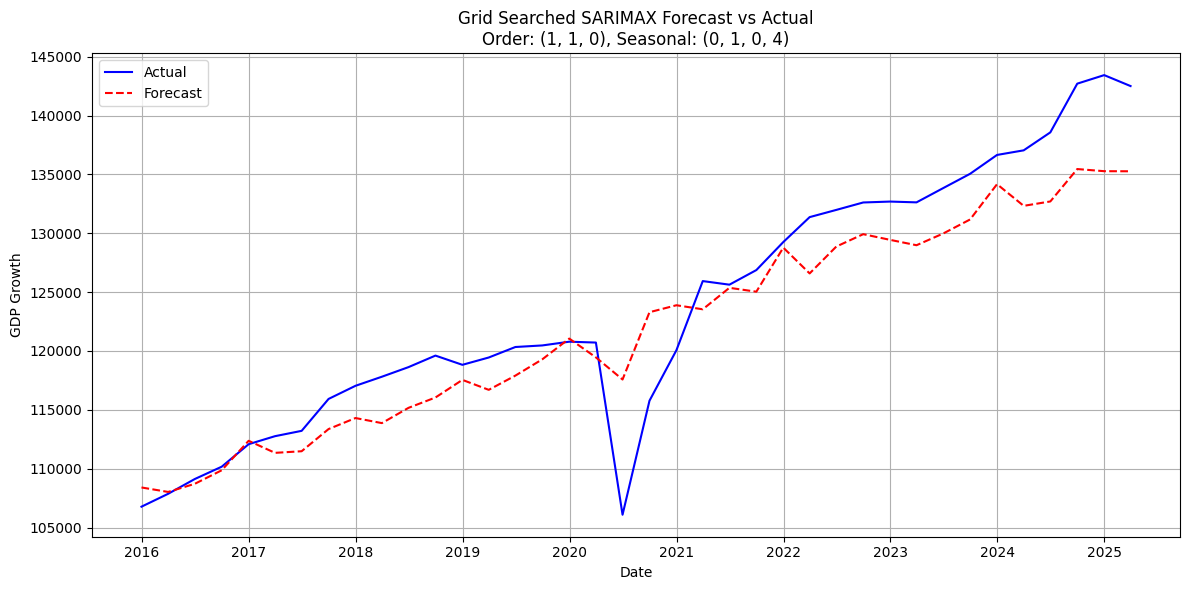

In [1]:
import itertools
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

df = pd.read_csv('ModellingData.csv', index_col=0)
df.index = pd.to_datetime(df.index)

# Define target and features
y = df['sg_gdp']
X = df.drop(columns=['sg_gdp', 'rsi'])

# Train-test split (temporal)
split_point = int(len(df) * 0.65)
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]

# SARIMAX parameter ranges
p = range(0, 4)  
P = range(0, 4)  
Q = range(0, 4)
q = range(0, 4)
m = 4  
d = 1  
D = 1  

# Generate all combinations
param_combinations = list(itertools.product(p, q, P, Q))

best_aic = np.inf
best_order = None
best_seasonal_order = None
total_combinations = len(param_combinations)
current_try = 0

warnings.filterwarnings("ignore")  # Suppress convergence warnings

print(f"\n=== Testing {total_combinations} parameter combinations ===")

for order in param_combinations:
    p, q, P, Q = order
    current_try += 1
    current_order = (p, d, q)
    current_seasonal = (P, D, Q, m)
    
    print(f"\nTRY {current_try}/{total_combinations}: Order={current_order}, Seasonal={current_seasonal}")
    
    try:
        model = SARIMAX(
            y_train,
            exog=X_train,
            order=current_order,
            seasonal_order=current_seasonal,
            enforce_stationarity=True,
            enforce_invertibility=True
        )
        results = model.fit(disp=0)
        
        print(f"AIC: {results.aic:.2f} | Converged: {results.mle_retvals['converged']}")
        
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = current_order
            best_seasonal_order = current_seasonal
            print(f"NEW BEST! AIC: {best_aic:.2f}")
            
    except Exception as e:
        print(f" Failed to fit: {str(e)}")
        continue

print("\n=== Best Parameters ===")
print(f"Order: {best_order}")
print(f"Seasonal Order: {best_seasonal_order}")
print(f"AIC: {best_aic:.2f}")

# Fit final model with best parameters
final_model = SARIMAX(
    y_train,
    exog=X_train,
    order=best_order,
    seasonal_order=best_seasonal_order
)
final_results = final_model.fit()

# Forecast
y_pred = final_results.forecast(steps=len(y_test), exog=X_test)

# Evaluation (unchanged from your original code)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# Adjusted R-squared
n = len(y_test)  # Number of observations in test set
k = X_test.shape[1] if X_test is not None else 0  # Number of exogenous features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Theil's U
def theils_u(actual, forecast):
    naive_forecast = actual.shift(1).dropna()
    actual = actual.iloc[1:]
    forecast = forecast.iloc[1:]
    rmse_model = np.sqrt(mean_squared_error(actual, forecast))
    rmse_naive = np.sqrt(mean_squared_error(actual, naive_forecast))
    return rmse_model / rmse_naive

u_stat = theils_u(y_test, y_pred)

print("\n====================")
print("     EVALUATION     ")
print("====================")
print(f"RMSE: {rmse:.3f} | MAE: {mae:.3f} | MAPE: {mape:.2f}%")
print(f"R²: {r2:.3f} | Adj. R²: {adjusted_r2:.3f} | Theil's U: {u_stat:.3f}\n")

# Plot forecast vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Forecast', color='red', linestyle='--')
plt.title(f'Grid Searched SARIMAX Forecast vs Actual\nOrder: {best_order}, Seasonal: {best_seasonal_order}')
plt.xlabel('Date')
plt.ylabel('GDP Growth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Comparing & Validating both Models
* MANUAL (1,1,0) (3,1,1,4) VS Auto (1,1,0) (0,1,0,4)
* Manually defined model shows better performance than grid-searched model.
* Testing to evaluate both models to identify best fit

**Comparing Metrics**

- Manual Model has better performance than the model found through Grid Search.
- Lower RMSE, MAE and MAPE

In [11]:
def evaluate_model(order, seasonal_order):
    model = SARIMAX(
        y_train, exog=X_train,
        order=order,
        seasonal_order=seasonal_order
    ).fit(disp=0)
    
    y_pred = model.forecast(steps=len(y_test), exog=X_test)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)
    mae = round(mean_absolute_error(y_test, y_pred), 3)
    mape_values = np.abs((y_test - y_pred) / y_test) * 100
    mape = round(np.mean(mape_values[np.isfinite(mape_values)]), 3)
    return rmse, mae, mape

manual_rmse, manual_mae, manual_mape = evaluate_model((1,1,0), (3,1,1,4))
grid_rmse, grid_mae, grid_mape = evaluate_model((1,1,0), (0,1,0,4))

print(f"Manual Model : RMSE = {manual_rmse} | MAE = {manual_mae} | MAPE = {manual_mape}%")
print(f"Grid Search  : RMSE = {grid_rmse} | MAE = {grid_mae} | MAPE = {grid_mape}%")

Manual Model : RMSE = 3326.767 | MAE = 2093.013 | MAPE = 1.721%
Grid Search  : RMSE = 4042.998 | MAE = 3160.85 | MAPE = 2.515%


**Comparison of Diagnostics of SARIMAX Model**
* Consists of 4 different plots:

STANDARDIZED RESIDUAL:   Both have randomized scatter with no obvious trend/seasonality

HISTOGRAM:               Lostly similar to a normal bell-shaped distribution with slight left skewness present

QUANTILE-QUANTILE PLOT:  Deviations are more present in the Auto model compared to Manual model

CORRELOGRAM:             Manual Model only has 1 lag outside confidence boundary while Auto has 3 lags.

MANUAL MODEL:



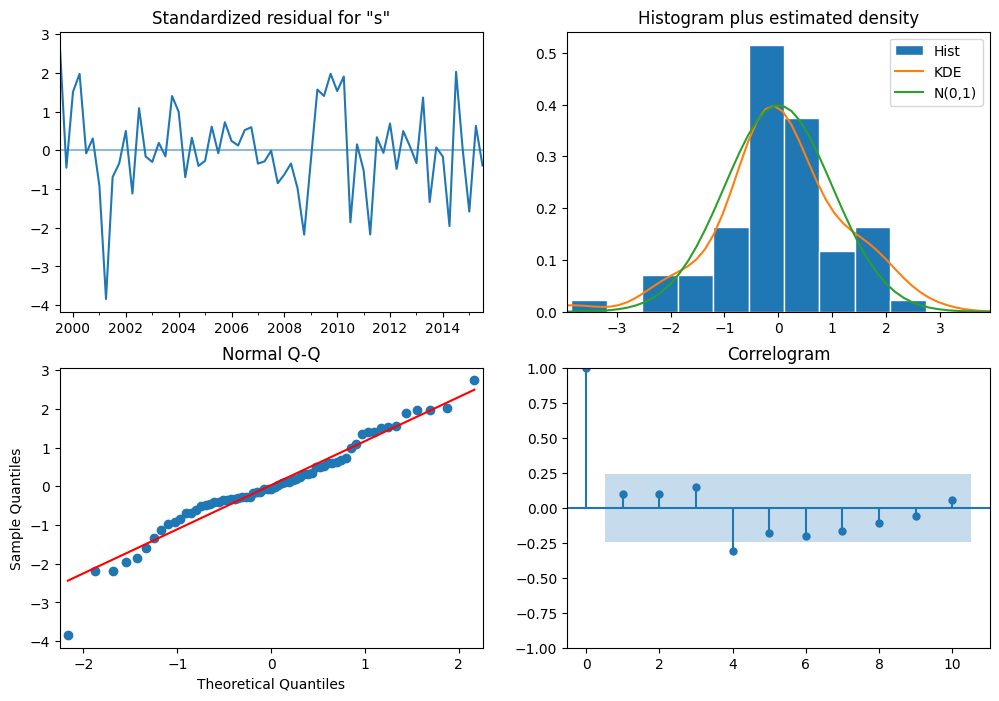

AUTO MODEL:



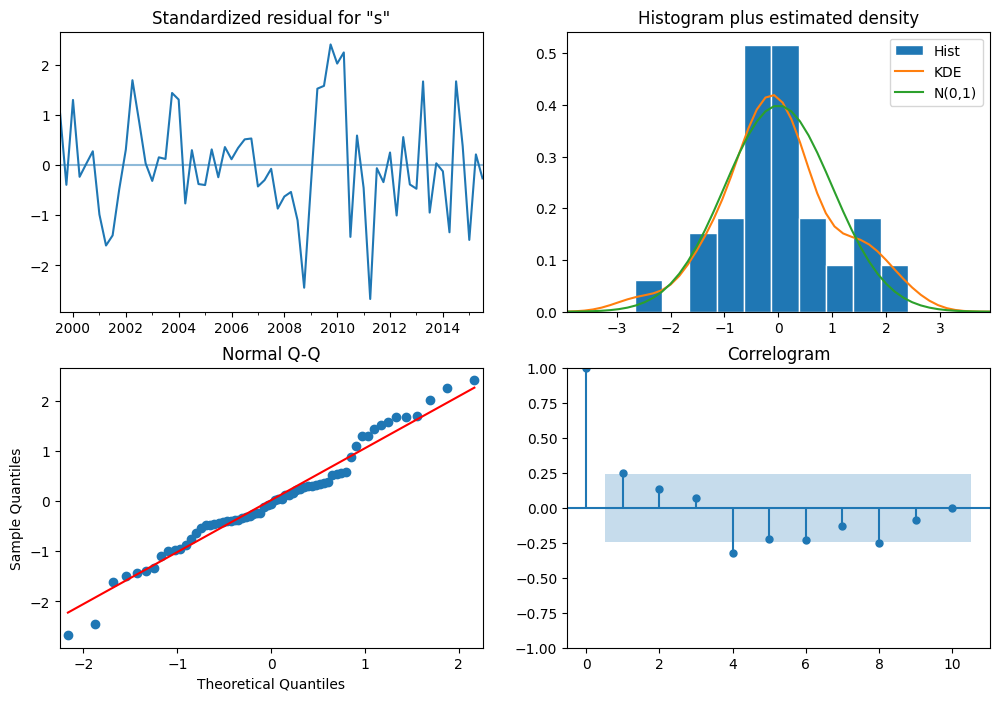

In [ ]:
manual_model = SARIMAX(
    y_train, exog=X_train,
    order=(1,1,0),
    seasonal_order=(3,1,1,4)
).fit()

auto_model = SARIMAX(
    y_train, exog=X_train,
    order=(1,1,0),
    seasonal_order=(0,1,0,4)
).fit()

print("MANUAL MODEL:\n")
manual_model.plot_diagnostics(figsize=(12,8))
plt.show()

print("AUTO MODEL:\n")
auto_model.plot_diagnostics(figsize=(12,8))
plt.show()

***CONCLUSION  -->*** Manually defined model (Order [1,1,0] Seasonal [3,1,1,4]) performs better than Grid Searched model (Order[1,1,0] Seasonal [0,1,0,4])

### Saving Model

In [16]:
pip install joblib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [18]:
import joblib

joblib.dump(sarimax_results, 'sg_gdp_sarimax.pkl') 

['sg_gdp_sarimax.pkl']

In [20]:
# Test reloaded model
loaded_model = joblib.load('sg_gdp_sarimax.pkl')
assert np.allclose(
    sarimax_results.forecast(steps=3, exog=X_test[:3]),
    loaded_model.forecast(steps=3, exog=X_test[:3])
)

## Future Predictions

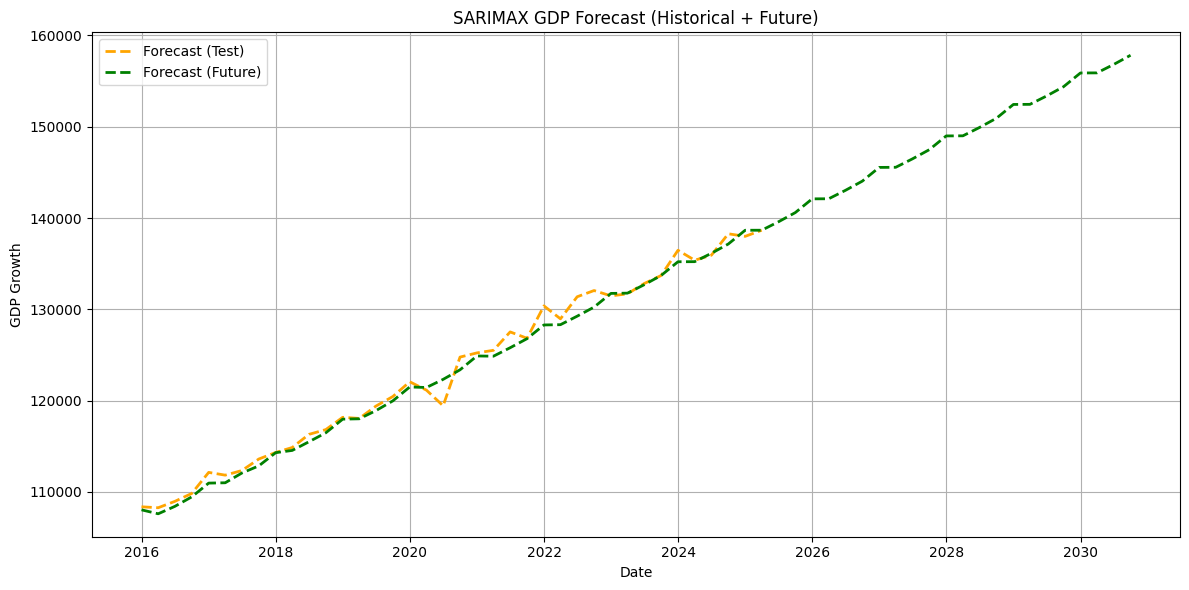

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from pandas.tseries.offsets import QuarterEnd

# 1. Load saved SARIMAX model
sarimax_results = joblib.load('sg_gdp_sarimax.pkl')

# 2. Load ModellingData
df = pd.read_csv('ModellingData.csv', index_col=0, parse_dates=True)
df.index = pd.to_datetime(df.index)
y = df['sg_gdp']
X = df.drop(columns=['sg_gdp', 'rsi'])  # Drop target + any unused exog

# 3. Historical prediction (for test range)
split_point = int(len(df) * 0.65)
y_test = y.iloc[split_point:]
X_test = X.iloc[split_point:]
y_pred_test = sarimax_results.forecast(steps=len(y_test), exog=X_test)

# 4. Extrapolate exog for next 8 quarters
n_future = 60
last_known_date = df.index[-1]  # e.g., '2025-03-31'
future_dates = pd.date_range(start=last_known_date + QuarterEnd(), periods=n_future, freq='Q')

# Use last row of X to forward fill (you can refine this with regression if needed)
X_future = pd.DataFrame([X.iloc[-1].values] * n_future, columns=X.columns, index=future_dates)

# 5. Forecast future
y_pred_future = sarimax_results.forecast(steps=n_future, exog=X_future)

# 6. Combine all for plotting
plt.figure(figsize=(12, 6))

# Plot test forecast
plt.plot(y_pred_test.index, y_pred_test, label='Forecast (Test)', linestyle='--', linewidth=2, color='orange')

# Plot future forecast
plt.plot(y_pred_future.index, y_pred_future, label='Forecast (Future)', linestyle='--', linewidth=2, color='green')

plt.title("SARIMAX GDP Forecast (Historical + Future)")
plt.xlabel("Date")
plt.ylabel("GDP Growth")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()